In [1]:
# %load ../snippets/start.py
# system packages
import os, sys
import warnings
warnings.filterwarnings('ignore')

# basic wrangling
import numpy as np
import pandas as pd

# eda tools
import missingno as msno
import pandas_profiling

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
# %load ../snippets/visual.py
# must go first
%matplotlib inline
%config InlineBackend.figure_format='retina'

# plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_context("poster", font_scale=1.3)

# Update matplotlib defaults to something nicer
mpl_update = {'font.size':16,
              'xtick.labelsize':14,
              'ytick.labelsize':14,
              'figure.figsize':[12.0,8.0],
              'axes.color_cycle':['#0055A7', '#2C3E4F', '#26C5ED', '#00cc66', '#D34100', '#FF9700','#091D32'],
              'axes.labelsize':20,
              'axes.labelcolor':'#677385',
              'axes.titlesize':20,
              'lines.color':'#0055A7',
              'lines.linewidth':3,
              'text.color':'#677385'}
mpl.rcParams.update(mpl_update)

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))


samplesubmission.csv
test.csv
train.csv



In [3]:
import pickle

In [4]:
Id = pickle.load(open('../proxy/Id','rb'))

In [44]:
train_df = pickle.load(open('../proxy/dataset2','rb'))

In [45]:
test_df = pickle.load(open('../proxy/dataset2_test','rb'))

In [46]:
train_df.shape

(108119, 8)

In [47]:
train_df

,disable_communication,country,currency,goal,final_status,days,mean_target,mean_target1
0,0,10,8,20.0,1,9.0,0.332229,0.225352
1,0,10,8,300.0,0,16.0,0.332229,0.225352
2,0,10,8,30.0,0,10.0,0.332229,0.225352
3,0,10,8,500.0,1,30.0,0.332229,0.225352
4,0,10,8,2000.0,0,30.0,0.332229,0.225352
5,0,10,8,700.0,0,28.0,0.332229,0.225352
6,0,10,8,250.0,0,25.0,0.332229,0.225352
7,0,10,8,1000.0,1,31.0,0.332229,0.225352
8,0,10,8,5000.0,0,33.0,0.332229,0.225352
9,0,10,8,3500.0,0,31.0,0.332229,0.225352


In [48]:
test_df.shape

(63465, 5)

In [49]:
y = train_df['final_status']

In [50]:
del train_df['final_status']

In [51]:
from sklearn.cross_validation import train_test_split

In [52]:
X_train,X_test,y_train,y_test = train_test_split(train_df, y,test_size=0.05, random_state=10,stratify = y)

In [53]:
from sklearn.ensemble import GradientBoostingClassifier

In [54]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

In [55]:
clf = GradientBoostingClassifier()

In [56]:
# accuracy_score = make_scorer(accuracy_score)

In [57]:
# param_grid = {'n_estimators':[100,120,150,200]}

In [58]:
# model = GridSearchCV(estimator=clf, param_grid=param_grid, scoring=accuracy_score,
#                                  verbose=10, n_jobs=-1, iid=True, refit=True, cv=2)

In [59]:
# model.best_params_

In [60]:
clf.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [61]:
train_pred = clf.predict_proba(X_train)

In [62]:
test_pred = clf.predict_proba(X_test)

In [25]:
final_testpred = clf.predict_proba(test_df)

ValueError: Number of features of the model must match the input. Model n_features is 6 and input n_features is 5 

In [63]:
import scikitplot as skplt

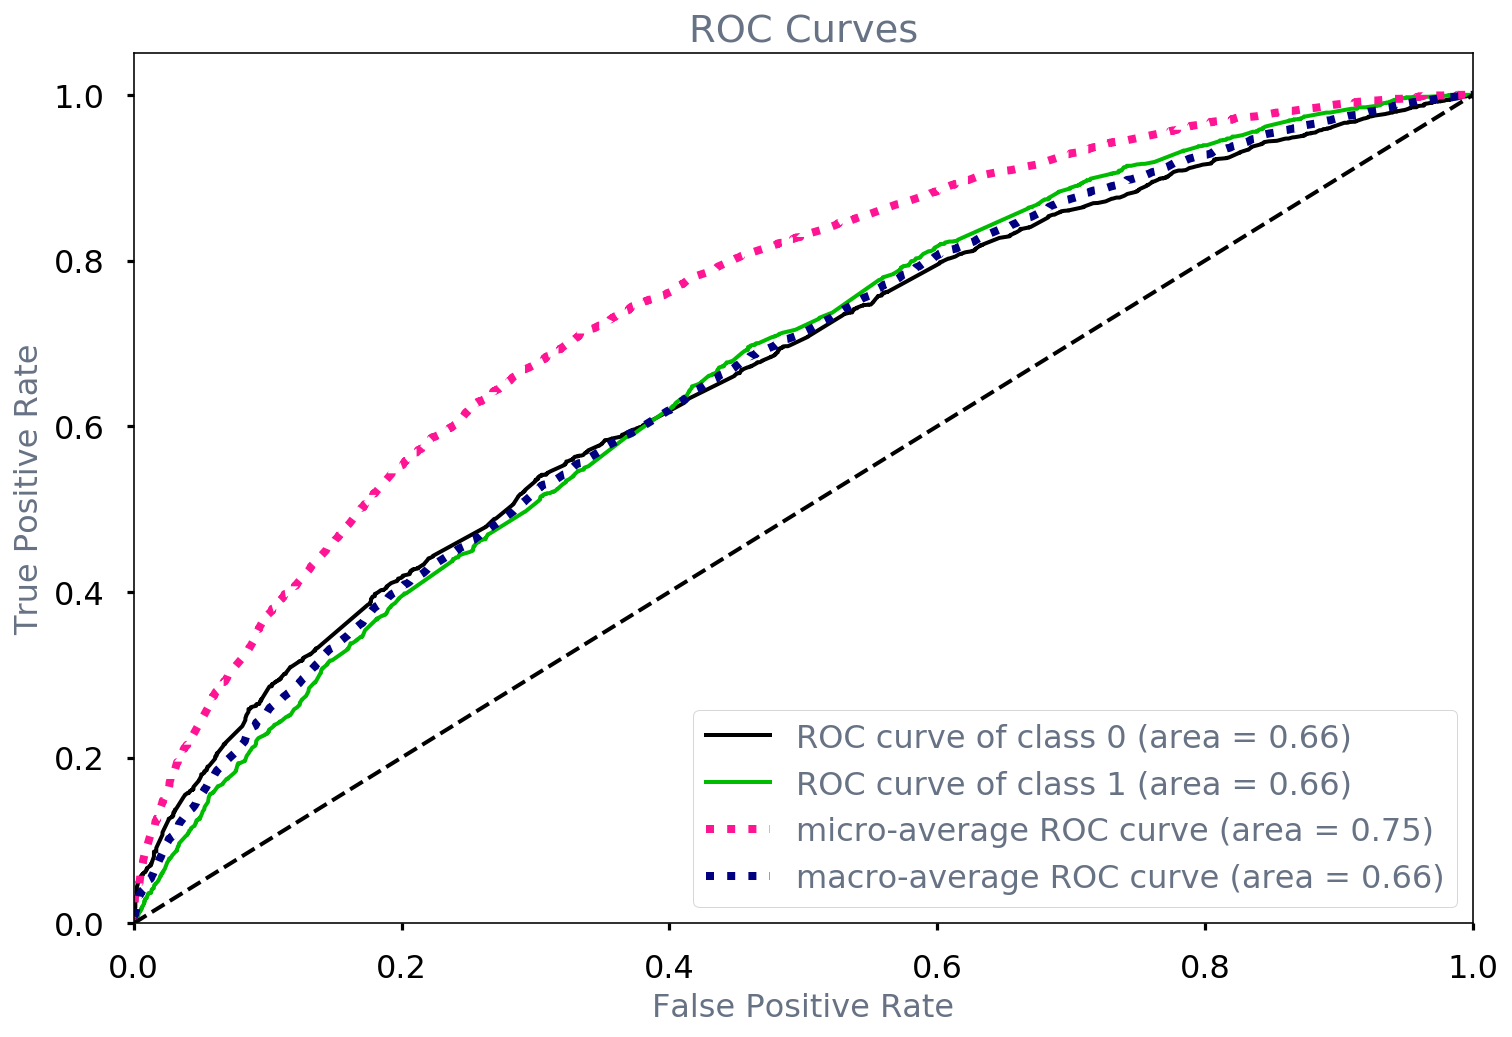

In [64]:
skplt.metrics.plot_roc_curve(y_test, test_pred)

IndexError: index 6 is out of bounds for axis 1 with size 6

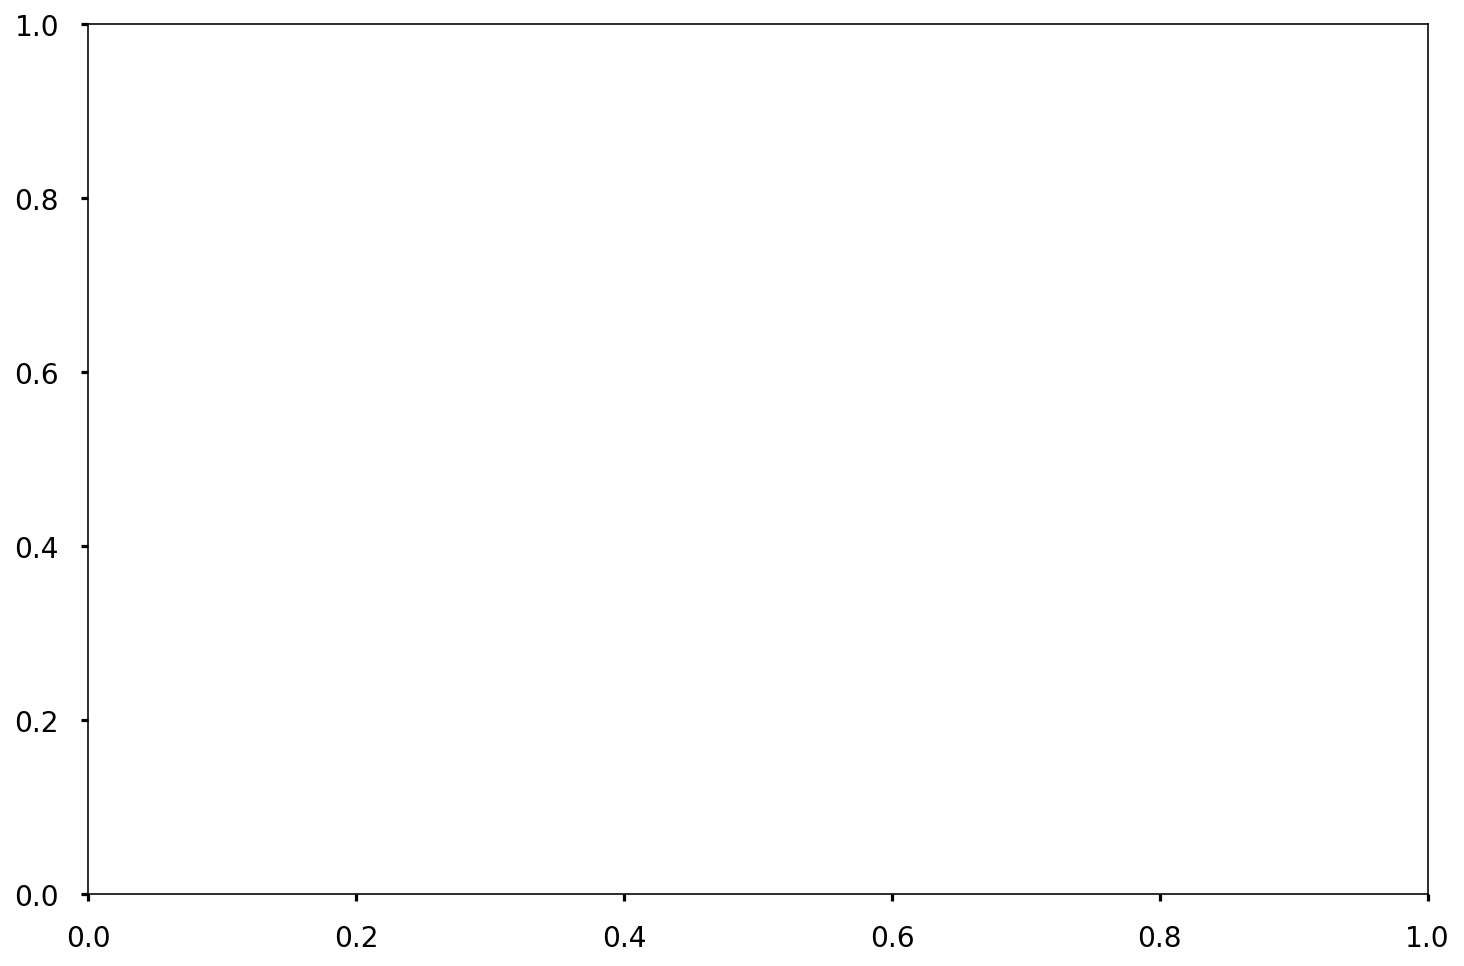

In [67]:
skplt.estimators.plot_feature_importances(clf,feature_names=['disable','country','currency','goal','days','mean_features'])

In [28]:
final_testpred[:,0]

NameError: name 'final_testpred' is not defined

In [38]:
def to_labels(x):
    if x > 0.99:  # cutoff - you can change it and see if accuracy improves or plot AUC curve. 
        return 1
    return 0

In [39]:
proxy_sub = pd.DataFrame({'final_status':test_pred[:,0]})

In [40]:
proxy_sub['final_status'] = proxy_sub['final_status'].map(lambda x: to_labels(x))

In [41]:
accuracy_score(y_test,proxy_sub['final_status'])

0.68035516093229742

In [ ]:
sub1 = pd.DataFrame({'project_id':Id, 'final_status':final_testpred[:,0]})

In [ ]:
sub1['final_status'] = sub1['final_status'].map(lambda x: to_labels(x))
sub1 = sub1[['project_id','final_status']]

In [ ]:
sub1.to_csv('../output/sub1_gb.csv', index=False)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf1 = RandomForestClassifier()

In [ ]:
clf1.fit(X_train,y_train)

In [ ]:
train_pred1 = clf1.predict_proba(X_train)

In [ ]:
test_pred1 = clf1.predict_proba(X_test)

In [ ]:
final_testpred1 = clf.predict_proba(test_df)

In [ ]:
skplt.metrics.plot_roc_curve(y_test, test_pred1)

In [ ]:
skplt.estimators.plot_feature_importances(clf1,feature_names=['disable','country','currency','goal','days'])

In [ ]:
def to_labels(x):
    if x > 0.63:  # cutoff - you can change it and see if accuracy improves or plot AUC curve. 
        return 1
    return 0

In [ ]:
proxy_sub1 = pd.DataFrame({'final_status':test_pred1[:,0]})

In [ ]:
proxy_sub1['final_status'] = proxy_sub1['final_status'].map(lambda x: to_labels(x))

In [ ]:
accuracy_score(y_test,proxy_sub1['final_status'])